In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from time import time
from copy import copy
%matplotlib inline


Problem 1
[a] (3 points) Write a code which computes the following sum $$
\sum_{j=0}^\infty e^{-j}
$$

using recursion and a tolerance based while loop approach.

[b] (2 points) Run your code in Problem 1[a] for tolerance 1e-2, 1e-4, 1e-6 and 1e-8.

[c] (3 points) Observe that sum in Problem 1[a] is a geometric series. Using the formula for the sum of a geometric progression, compute $$
\sum_{j=0}^\infty e^{-j}
$$

to 9 significant figures.

[d] (2 points) Compare your result from Problem 1[b] and [c] and discuss your observation.

Answer to 1A)

In [2]:
def sumofe(tol):
    tot = 1
    aj = 1
    e1 = 1/np.e
    while np.abs(aj) >= tol:
        aj *= e1
        tot += aj
    return tot

Answer to 1B)

In [3]:
sumofe(1e-2)

1.5780553786637388

In [4]:
sumofe(1e-4)

1.5819502851677112

In [5]:
sumofe(1e-6)

1.5819762229389809

In [6]:
sumofe(1e-8)

1.5819767036086296

Answer to 1C)

In [7]:
def sumGeoProg(first,comRatio,numTerms ):
    sum = 0
    if comRatio == 1:
        return
    sum = (first * (1- math.pow(comRatio,numTerms)))/(1-1/np.e)
    return sum

In [8]:
sumGeoProg(1,1/np.e,9)

1.5817814754338622

Answer to 1D)

The results from 1[b] w/ a tolerance 1e-4 and up have the same result as 1[c] up to 3 significant digits. Since this is a geometric series we are able to use the sum of a geometric progression which has a comparable result to our functions results using recursion and a tolerance based while loop approach.

Problem 2

[2a] (5 points) Write a code to graph the following function in the interval [-1,4]

$$
y(x) = \left\{
\begin{array}{rl}
0  \quad \text{for} \quad x < 0 \\
x  \quad \text{for} \quad 0\leq x \leq 1 \\
2-x  \quad \text{for} \quad 1 \lt x \leq 2 \\
0  \quad \text{for} \quad x > 2 
\end{array}
\right.
$$
[2b] (1 point) Create 11 points from -1 to 4 and assign it to x. Using this x value, plot y(x)

[2c] (1 point) Create 1e1 points from -1 to 4 and assign it to x. Using this x value, plot y(x)

[2d] (1 point) Create 1e5 points from -1 to 4 and assign it to x. Using this x value, plot y(x)

[2e] (2 point) Compare your plots for 2[b], [c] and [d]. Discuss your observations.

Answer to Problem 2

Answer 2A)

In [9]:
def function(x):
    if (0<=x<=1):
        return x
    elif (1<x<=2):
        return (2-x)
    else:
        return 0

Answer 2B)

Text(0.5,1,'[-1,4] w/ 11 points')

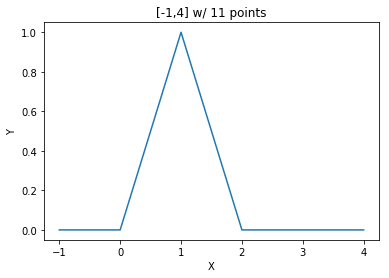

In [10]:
xvals = np.linspace(-1,4,11)
yvals = [function(x) for x in xvals]
plt.plot(xvals,yvals)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('[-1,4] w/ 11 points')

Answer 2C)

Text(0.5,1,'[-1,4] w/ 1e1 points')

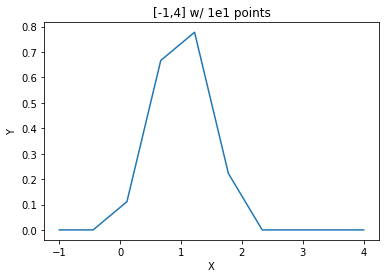

In [11]:
xvals = np.linspace(-1,4,int(1e1))
yvals = [function(x) for x in xvals]
plt.plot(xvals,yvals)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('[-1,4] w/ 1e1 points')

Answer 2D)

Text(0.5,1,'[-1,4] w/ 1e5 points')

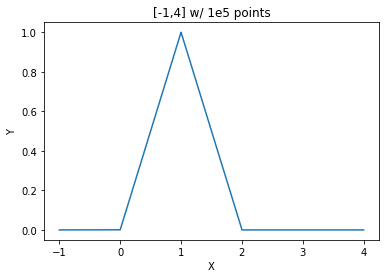

In [12]:
xvals = np.linspace(-1,4,int(1e5))
yvals = [function(x) for x in xvals]
plt.plot(xvals,yvals)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('[-1,4] w/ 1e5 points')

Answer 2e)

The graphs of 2[b] and 2[d] are exactly the same graph. This shows that there was no discrepencry from haveing 11 points in the xvals and having 1e5 points in the xvals. The graph of 2[c] only shows 10 xvals and thus doesnt share the same constant slope of increase and decrease that both 2[b] and 2[d] share.

Problem 3: Given that

$$
\cos(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{2j}, ~ \sin(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j+1)!}x^{2j+1}
$$
and

$$
\cos(a-b) = \cos(a)\cos(b) + \sin(a)\sin(b)
$$
[a] (4 points) Derive a Taylor series for $$\cos(2x^4)\cos(x^4) + \sin(2x^4)\sin(x^4)$$ around $x=0$.

[b] (4 points) Using your answer from Problem 3[a], write a code which computes the Taylor series of $$\cos(2x^4)\cos(x^4) + \sin(2x^4)\sin(x^4)$$ using recursion, vectorization, and a tolerance based while loop approach.

[c] (2 pts) On the interval $[0,\pi]$, plot the semi-log error in your approximation for tolerance values $10^{-4}$, $10^{-6}$, and $10^{-8}$. Label axes and provide a legend for your graph.

[d] (2pts) Describe your graphs and comment on any trends you observe.

Answer to Problem 3

Answer to 3A)

$$\cos(2x^4)\cos(x^4) + \sin(2x^4)\sin(x^4)$$ 

$$\cos(2x^4)\cos(x^4) + \sin(2x^4)\sin(x^4)= cos(2x^4 - x^4)$$

$$= cos(2x^4 - x^4) = cos(x^4) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{8j}$$

Answer to 3B)

In [18]:
def taylorSum(x,tol):
    tot = x**4.
    aj = copy(tot)
    j =1
    xSum = -x**8.
    while np.max(np.abs(aj)) >= tol:
        aj *= xSum/((2.*j)*(2.*j-1.))
        tot +=aj
        j+=1
    return tot

Answer to 3C)

In [21]:
xvals = np.linspace(0,np.pi,int(1e2))
yvals = [np.cos(ii**4) for ii in xvals]
yvals1 = [taylorSum(ii,1e-3) for ii in xvals]
yvals2 = [taylorSum(ii,1e-5) for ii in xvals]
yvals3 = [taylorSum(ii,1e-7) for ii in xvals]
yvals1_vec =  taylorSum(xvals,1e-3)
yvals2_vec =  taylorSum(xvals,1e-5)
yvals3_vec =  taylorSum(xvals,1e-7)

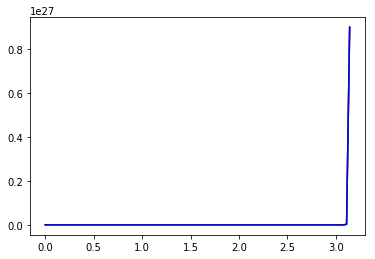

In [24]:
plt.plot(xvals,yvals1_vec,color ='r')
plt.plot(xvals,yvals2_vec,color ='g')
plt.plot(xvals,yvals3_vec,color ='b')

Answer to 3D)

The graphs all line up to be the same line overlapping eachother with the same tolerance.



Problem 4

[a] (6 points) - Another very important class of special functions are called the Laguerre Polynomials, say $L_{n}(x)$, which are defined for non-negative integer $n$ via the series

$$
L_{n}(x) = \sum_{k=0}^{n}\frac{n!}{k!(n-k)!}\frac{(-1)^k}{k!} x^{k}, ~ -2\leq x \leq 2.
$$
Using a for-loop, vectorized, recursive approach, write a function which computes the Laguerre functions for any non-negative integer $n$

[b] (3 points). Make a plot showing $L_{n}(x)$ for $n=0,1,2,3,4$ on the same graph, using different colors for each different $n$.

[c] (2 points) The plot should have a legend as well as appropriately labeled axes.

[d] (3 points) Write down the expression for $L_{0}(x)$ and $L_{1}(x)$ by replacing $n$ with $0$ and $1$ respectively in the equation for $L_{n}(x)$ above. Compare your expression for $L_{0}(x)$ and $L_{1}(x)$ with the graph in Problem 4[b]. Discuss your observations.

Answer to 4A)

Answer to 4B)

Answer to 4C)

Answer to 4D)

Problem 5: 4 pts- Using a vectorized approach, which means no explicit for loops, write a program which finds

$$
f(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{5} + 6\left(\frac{j}{n}\right)^{3} \right)
$$
for any positive integer n.

Answer to Problem 5

In [16]:
def function1(n):
    return sum((j/n)**5 + 6* (j/n)**3. for j in xrange(1,int(n)+1))/n

In [17]:
function1(1e6)

1.6666701666685813